# Desafío inventures 

*Realizado por Pablo Cortés Cataldo.*

In [1]:
# Librerías usadas
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from datetime import datetime

Se cargan los datos.

In [2]:
nombre = 'vehicle_gps.csv'
pd.options.display.max_rows = 80
df = pd.read_csv(nombre)
df

,vehicle,latitude,longitude,timestamp
0,A,-33.416709,-70.592693,01-01-2022 8:01
1,A,-33.417425,-70.592487,01-01-2022 8:02
2,A,-33.417831,-70.592367,01-01-2022 8:04
3,A,-33.417879,-70.592018,01-01-2022 8:05
4,A,-33.417818,-70.591653,01-01-2022 8:06
5,A,-33.417763,-70.591365,01-01-2022 8:07
6,A,-33.417742,-70.591373,01-01-2022 8:08
7,A,-33.417691,-70.591139,01-01-2022 8:09
8,A,-33.417616,-70.590700,01-01-2022 8:10
9,A,-33.417424,-70.589862,01-01-2022 8:11


Existen algunos nodos duplicados por la ubicación.

In [3]:
duplicados_mask = df.duplicated(subset=['latitude', 'longitude'], keep=False)
duplicados_index = df[duplicados_mask].index
print(duplicados_index)

Index([37, 43, 44, 54], dtype='int64')


Se genera una nueva columna **nodo_id** en base al indice del dataframe.

In [4]:
df['nodo_id'] = df.index

Se cambia el tipo de datos de la columna **timestamp** al tipo datetime.

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%Y %H:%M')

Luego el dataframe se agrupa por la columna **vehicle** para asi determinar el tiempo entre nodos, el cual se agrega a una nueva columna **tiempo**.

In [6]:
grupos = df.groupby('vehicle')

for nombre_grupo, grupo in grupos:
    grupo['tiempo'] = grupo['timestamp'].diff().apply(lambda x: x.seconds)
    df.loc[grupo.index, 'tiempo'] = grupo['tiempo']
    
df

,vehicle,latitude,longitude,timestamp,nodo_id,tiempo
0,A,-33.416709,-70.592693,2022-01-01 08:01:00,0,NaN
1,A,-33.417425,-70.592487,2022-01-01 08:02:00,1,60.0
2,A,-33.417831,-70.592367,2022-01-01 08:04:00,2,120.0
3,A,-33.417879,-70.592018,2022-01-01 08:05:00,3,60.0
4,A,-33.417818,-70.591653,2022-01-01 08:06:00,4,60.0
5,A,-33.417763,-70.591365,2022-01-01 08:07:00,5,60.0
6,A,-33.417742,-70.591373,2022-01-01 08:08:00,6,60.0
7,A,-33.417691,-70.591139,2022-01-01 08:09:00,7,60.0
8,A,-33.417616,-70.590700,2022-01-01 08:10:00,8,60.0
9,A,-33.417424,-70.589862,2022-01-01 08:11:00,9,60.0


## Grafo original

Se define el grafo G con los nodos originales.

In [7]:
G = nx.Graph()

Se itera en las filas del dataframe para agregar cada nodo al grafo G.

In [8]:
for index, fila in df.iterrows():
    lat = float(fila['latitude'])
    lon = float(fila['longitude'])
    pos = (lat, lon)
    nodo_id = fila['nodo_id']
    vehicle = fila['vehicle']
    G.add_node(nodo_id, pos=pos, vehicle=vehicle)
        
print(nx.info(G))

Graph with 77 nodes and 0 edges


Se genera una lista para almacenar las listas de indices de los nodos por tipo de vehículo.

In [9]:
# Tipos de vehiculos
vehicles = df['vehicle'].unique()

# Lista de nodos por vehículo
lista_n_v = []

# Se almacenan las listas de nodos por vehículo
for vehicle in vehicles:
    lista_n = []
    for nodo in df.loc[df['vehicle'] == vehicle, 'nodo_id']:
        lista_n.append(nodo)
    lista_n_v.append(lista_n)

Se agregan los arcos al grafo G.

In [10]:
for idxs in lista_n_v:
    for idx in idxs:
# Solo se toma en cuenta hasta el penúltimo índice para evitar arcos inexistentes
        if idx < idxs[-1]: 
            nodo_id = idx
            nodo_id_sig = idx+1
            tiempo = df.loc[nodo_id_sig, 'tiempo']
            G.add_edge(nodo_id, nodo_id_sig, weight = tiempo)
                
print(nx.info(G))

Graph with 77 nodes and 73 edges


Se ha generado un grafo para mejorar su visualización, lo que permite observar claramente la presencia de nodos que se conectan entre sí. Se puede inferir que los vehículos en algunos tramos siguieron la misma ruta. Para facilitar la identificación de los arcos que unen cada nodo, se decidió aplicar una simplificación del grafo mediante el algoritmo KMeans. Esta técnica también es útil ya que algunos de los nodos están muy cerca y, en algunos casos, se superponen, como ocurre con los pares (37,54) y (43,44).

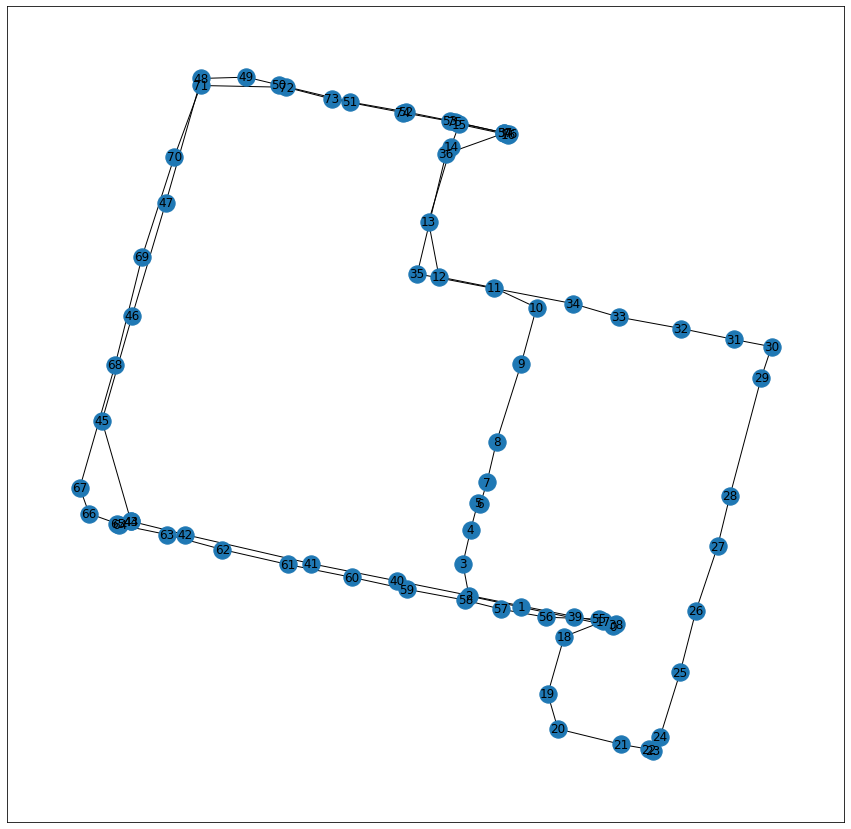

In [11]:
pos = {node: (data['pos'][0], data['pos'][1]) for node, data in G.nodes(data=True)}
fig = plt.figure(figsize=(15, 15))
nx.draw_networkx(G, pos=pos, with_labels=True)
plt.show()

## Grafo simplificado

Se aplica el algoritmo KMeans solo para las columnas **latitude** y **longitude**.

La cantidad de cluster se escoge mirando el grafo original, en donde se estima que hay una cantidad bastante alta de nodos cercanos o superpuestos.

In [12]:
X = df[['latitude', 'longitude']].values
kmeans = KMeans(n_clusters=35, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

Luego se genera un nuevo grafo simplificado llamado Gs y se agregan los nuevos nodos que vendrían a ser los centroides de cada uno de los clusters identificados.

In [13]:
Gs = nx.Graph()
for i, centroid in enumerate(centroids):
    Gs.add_node(i, pos=(centroid[0], centroid[1]))

Nuevamente se agregan los arcos pero al grafo simplificado de la siguiente manera:

- Primero se determina la distancia euclideana entre cada centroide y los nodos que conforman cada arco del grafo original G.
- Luego se determina el centroide más cercano a cada uno de estos nodos extremos.
- Para evitar bucles innecesarios en el mismo nodo simplificado, se escoge el segundo menor si es que el centroide mas cercano a cada uno de los nodos de un arco corresponde al mismo.
- Entonces se define el arco como con aquellos centroides que tienen la menor distancia a los nodos originales.
- Luego se almacenan los pesos de los arcos originales para determinar el peso promedio, que en este caso serian los tiempos promedios de los arcos consolidados entre los nodos simplificados o agrupados. (Los nodos se guardan como pares no ordenados, por eso se debe comprobar el orden invertido)

In [15]:
# Se define un diccionario para almacenar los peso originales de los arcos s.
original_weights = {} 
for edge_0, edge_1, data in G.edges(data=True):
# Se determina la distancia euclideana 
    dists0 = np.linalg.norm(X[edge_0] - centroids, axis=1)
    dists1 = np.linalg.norm(X[edge_1] - centroids, axis=1)
    
# Se determina el centroide mas cercano a los dos nodos del borde del arco
    centroid_idx0 = np.argmin(dists0)
    centroid_idx1 = np.argmin(dists1)

# Si el centroide es el mismo, se ocupa el segundo menor
    if centroid_idx0 == centroid_idx1:
        dists0_ordenadas = np.argsort(dists0)
        dists1_ordenadas = np.argsort(dists1)
# Si comparan los dos c
        if dists0_ordenadas[1] < dists1_ordenadas[1]:
            centroid_idx0 = dists0_ordenadas[1]
        else:
            centroid_idx1 = dists1_ordenadas[1]
        
# Se define el arco del grafo simplificado    
    Gs_edge = (centroid_idx0, centroid_idx1)

# Se agregan los arcos al nodo simplificado
    if Gs_edge not in Gs.edges():
        Gs.add_edge(*Gs_edge, weight=0)
        
# Se agregan a los arcos simplificados los tiempos del arco original
    if Gs_edge not in original_weights:
        original_weights[Gs_edge] = []
    original_weights[Gs_edge].append(data['weight'])

Consolidación de los pesos del arco del grafo simplificado mediante el promedio de los peso del grafo original.

In [16]:
for Gs_edge in Gs.edges:
    inverted_edge = (Gs_edge[1], Gs_edge[0])

# Si el arco simplificado y el invertido estan, entonces se saca promedio
    if Gs_edge in original_weights and inverted_edge in original_weights:
        Gs.edges[Gs_edge]['weight'] = (sum(original_weights[Gs_edge]) + sum(original_weights[inverted_edge])) / (len(original_weights[Gs_edge]) + len(original_weights[inverted_edge]))

# Si el arco simplifcado esta y el invertido no, entonces es el promedio del s.
    elif Gs_edge in original_weights and inverted_edge not in original_weights:
        Gs.edges[Gs_edge]['weight'] = sum(original_weights[Gs_edge]) / len(original_weights[Gs_edge])

# Si solo el invertido esta en el diccionario y el original no entonces
    elif Gs_edge not in original_weights and inverted_edge in original_weights:
        Gs.edges[Gs_edge]['weight'] = sum(original_weights[inverted_edge]) / len(original_weights[inverted_edge])
  
    else:
        Gs.edges[Gs_edge]['weight'] = 0

Se ven los arcos simplificados generados con su respectivo tiempo.

In [17]:
for u, v, attrs in Gs.edges(data=True):
    print(f"Arco ({u}, {v}) tiene un tiempo de {attrs['weight']}")

Arco (0, 18) tiene un tiempo de 60.0
Arco (0, 24) tiene un tiempo de 90.0
Arco (1, 15) tiene un tiempo de 80.0
Arco (1, 20) tiene un tiempo de 80.0
Arco (1, 9) tiene un tiempo de 60.0
Arco (2, 26) tiene un tiempo de 60.0
Arco (2, 19) tiene un tiempo de 60.0
Arco (2, 11) tiene un tiempo de 120.0
Arco (2, 32) tiene un tiempo de 60.0
Arco (3, 12) tiene un tiempo de 0.0
Arco (3, 16) tiene un tiempo de 72.0
Arco (3, 33) tiene un tiempo de 120.0
Arco (4, 34) tiene un tiempo de 40.0
Arco (4, 17) tiene un tiempo de 90.0
Arco (5, 15) tiene un tiempo de 30.0
Arco (6, 22) tiene un tiempo de 60.0
Arco (6, 17) tiene un tiempo de 0.0
Arco (7, 29) tiene un tiempo de 120.0
Arco (7, 25) tiene un tiempo de 60.0
Arco (8, 14) tiene un tiempo de 45.0
Arco (8, 21) tiene un tiempo de 90.0
Arco (9, 22) tiene un tiempo de 60.0
Arco (10, 28) tiene un tiempo de 120.0
Arco (10, 18) tiene un tiempo de 30.0
Arco (10, 25) tiene un tiempo de 120.0
Arco (11, 23) tiene un tiempo de 60.0
Arco (11, 26) tiene un tiempo de

Se genera el grafo simplificado.

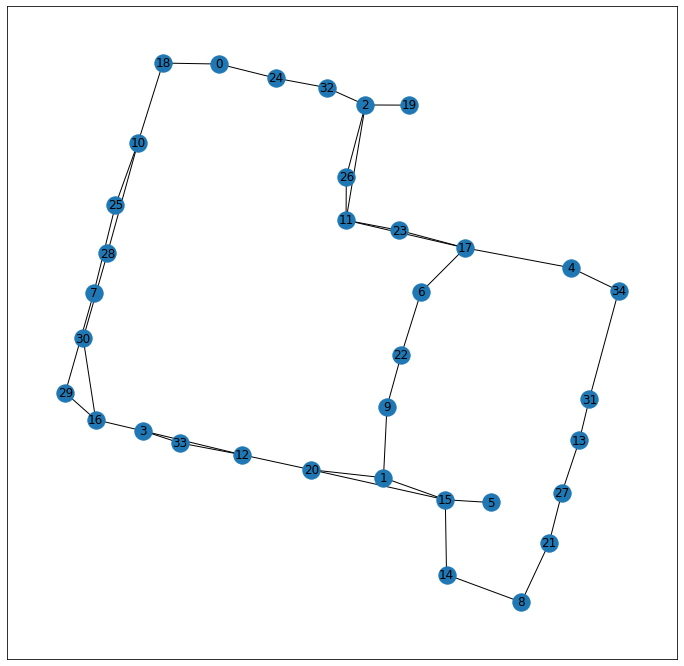

In [18]:
pos = {node: (data['pos'][0], data['pos'][1]) for node, data in Gs.nodes(data=True)}
fig = plt.figure(figsize=(12, 12))
nx.draw_networkx(Gs, pos=pos, with_labels=True)
plt.show()

Se define una función que determina el tiempo entre nodos mediante el algoritmo dijkstra, el cual determina que ruta es la mas corta entre dos nodos.

In [19]:
def tiempo_entre_nodos(origen, destino):
    ruta = nx.dijkstra_path(Gs, origen, destino, weight='weight')
    tiempo = nx.dijkstra_path_length(Gs, origen, destino, weight='weight')
    ruta_nodos = [(ruta[i], ruta[i+1]) for i in range(len(ruta)-1)]
    return {'tiempo': tiempo, 'ruta_nodos': ruta_nodos, 'ruta': ruta}

In [20]:
datos = tiempo_entre_nodos(11,9)
datos

{'tiempo': 240.0,
 'ruta_nodos': [(11, 17), (17, 6), (6, 22), (22, 9)],
 'ruta': [11, 17, 6, 22, 9]}

Se define una función de equivalencia de nodos simplificados con los originales para determinar que nodos originales se recorren.

In [21]:
# Función para ver equivalencia de nodos simplificados con originales
def equivalencia_de_nodos(labels):  
    dict_nodos = {}
# Se recorre la lista de nodos simplificados
    for label_u in np.unique(labels):
        lista_nodos = []
# Si el nodo simplificado corresponde, entonces se almacena el id del nodo original
        for id, label in zip(df['nodo_id'], labels):
            if label == label_u:
                lista_nodos.append(id)
        dict_nodos[label_u] = lista_nodos
    return dict_nodos

In [22]:
dict_nodos = equivalencia_de_nodos(labels)
dict_nodos

{0: [49, 50, 72],
 1: [2, 3, 57, 58],
 2: [14, 15, 36, 53, 75],
 3: [42, 63],
 4: [31, 32],
 5: [0, 17, 38, 55],
 6: [9],
 7: [68],
 8: [21, 22, 23, 24],
 9: [4, 5, 6, 7],
 10: [47, 70],
 11: [12, 35],
 12: [41, 61],
 13: [27],
 14: [19, 20],
 15: [1, 18, 39, 56],
 16: [43, 44, 64, 65, 66],
 17: [10, 33, 34],
 18: [48, 71],
 19: [16, 37, 54, 76],
 20: [40, 59, 60],
 21: [25],
 22: [8],
 23: [11],
 24: [51, 73],
 25: [69],
 26: [13],
 27: [26],
 28: [46],
 29: [67],
 30: [45],
 31: [28],
 32: [52, 74],
 33: [62],
 34: [29, 30]}

In [23]:
def conversion_nodos_originales(datos, dict_nodos):
    # Lista para almacenar nodos originales
    nodos_originales = []
    # Bucle para recorrer la ruta de nodos del grafo simplificado 
    for nodo_g_s in datos['ruta']:
        # Bucle para recorrer todos los nodos simplificados
        for nodo_s, nodo_id in dict_nodos.items():
            # Se identifica por cuales nodos se atraviesa
            if nodo_g_s == nodo_s:
                nodos_originales.append(nodo_id)
    return nodos_originales

In [24]:
conversion_nodos_originales(datos, dict_nodos)   

[[12, 35], [10, 33, 34], [9], [8], [4, 5, 6, 7]]

## Grafo simplificado y optimizado

En este caso además de simplificar el grafo mediante el algoritmo Kmeans, también se determina el número optimo de clusters mediante las inercias (método del codo) y el puntaje de silhouette.

In [25]:
k_range = range(1,60)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Se grafican las inercias.

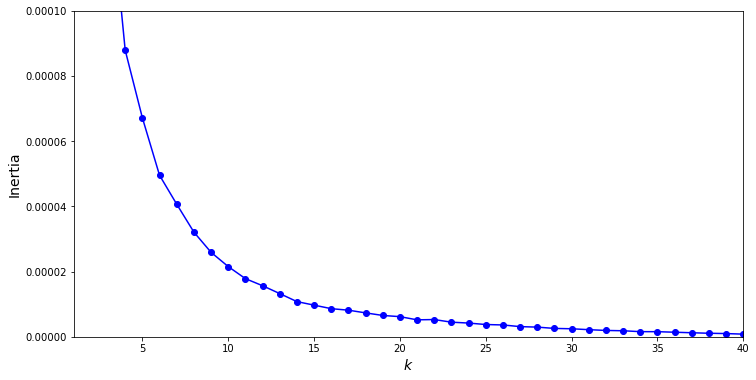

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 40, 0, 0.0001])
plt.show()

Se calcula el puntaje de silhouette.

In [27]:
silhouette_scores = [silhouette_score(X, model.labels_) 
                     for model in kmeans_per_k[1:]]

Se determina la mejor cantidad de cluster que agrupan de mejor forma los datos.

In [28]:
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

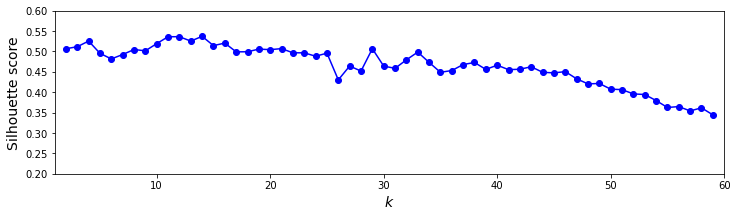

In [29]:
plt.figure(figsize=(12, 3))
plt.plot(range(2, 60), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1, 60, 0.2, 0.6])
plt.show()

In [30]:
best_k

13

Se vuelven a calcular los centroides con 13 cluster y se genera nuevamente el grafo simplificado.

In [31]:
kmeans = KMeans(n_clusters=13, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [32]:
Gs = nx.Graph()
for i, centroid in enumerate(centroids):
    Gs.add_node(i, pos=(centroid[0], centroid[1]))

In [33]:
# Se define un diccionario para almacenar los peso originales de los arcos s.
original_weights = {} 
for edge_0, edge_1, data in G.edges(data=True):
# Se determina la distancia euclideana 
    dists0 = np.linalg.norm(X[edge_0] - centroids, axis=1)
    dists1 = np.linalg.norm(X[edge_1] - centroids, axis=1)
    
# Se determina el centroide mas cercano a los dos nodos del borde del arco
    centroid_idx0 = np.argmin(dists0)
    centroid_idx1 = np.argmin(dists1)

# Si el centroide es el mismo, se ocupa el segundo menor
    if centroid_idx0 == centroid_idx1:
        dists0_ordenadas = np.argsort(dists0)
        dists1_ordenadas = np.argsort(dists1)
        
        if dists0_ordenadas[1] < dists1_ordenadas[1]:
            centroid_idx0 = dists0_ordenadas[1]
        else:
            centroid_idx1 = dists1_ordenadas[1]
        
# Se define el arco del grafo simplificado    
    Gs_edge = (centroid_idx0, centroid_idx1)

# Se agregan los arcos al nodo simplificado
    if Gs_edge not in Gs.edges():
        Gs.add_edge(*Gs_edge, weight=0)
        
# Se agregan a los arcos simplificados los tiempos del arco original
    if Gs_edge not in original_weights:
        original_weights[Gs_edge] = []
    original_weights[Gs_edge].append(data['weight'])

Consolidación de los pesos del arco del grafo simplificado mediante el promedio de los peso del grafo original.

In [34]:
for Gs_edge in Gs.edges:
    inverted_edge = (Gs_edge[1], Gs_edge[0])

# Si el arco simplificado y el invertido estan, entonces se saca promedio
    if Gs_edge in original_weights and inverted_edge in original_weights:
        Gs.edges[Gs_edge]['weight'] = (sum(original_weights[Gs_edge]) + sum(original_weights[inverted_edge])) / (len(original_weights[Gs_edge]) + len(original_weights[inverted_edge]))

# Si el arco simplifcado esta y el invertido no, entonces es el promedio del s.
    elif Gs_edge in original_weights and inverted_edge not in original_weights:
        Gs.edges[Gs_edge]['weight'] = sum(original_weights[Gs_edge]) / len(original_weights[Gs_edge])

# Si solo el invertido esta en el diccionario y el original no entonces
    elif Gs_edge not in original_weights and inverted_edge in original_weights:
        Gs.edges[Gs_edge]['weight'] = sum(original_weights[inverted_edge]) / len(original_weights[inverted_edge])
  
    else:
        Gs.edges[Gs_edge]['weight'] = 0

In [35]:
for u, v, attrs in Gs.edges(data=True):
    print(f"Arco ({u}, {v}) tiene un tiempo de {attrs['weight']}")

Arco (0, 10) tiene un tiempo de 108.0
Arco (0, 8) tiene un tiempo de 55.714285714285715
Arco (1, 12) tiene un tiempo de 40.0
Arco (2, 7) tiene un tiempo de 73.33333333333333
Arco (2, 9) tiene un tiempo de 60.0
Arco (3, 6) tiene un tiempo de 60.0
Arco (3, 10) tiene un tiempo de 30.0
Arco (4, 9) tiene un tiempo de 90.0
Arco (4, 8) tiene un tiempo de 60.0
Arco (5, 11) tiene un tiempo de 60.0
Arco (5, 10) tiene un tiempo de 75.0
Arco (6, 12) tiene un tiempo de 60.0
Arco (6, 7) tiene un tiempo de 80.0
Arco (11, 12) tiene un tiempo de 120.0


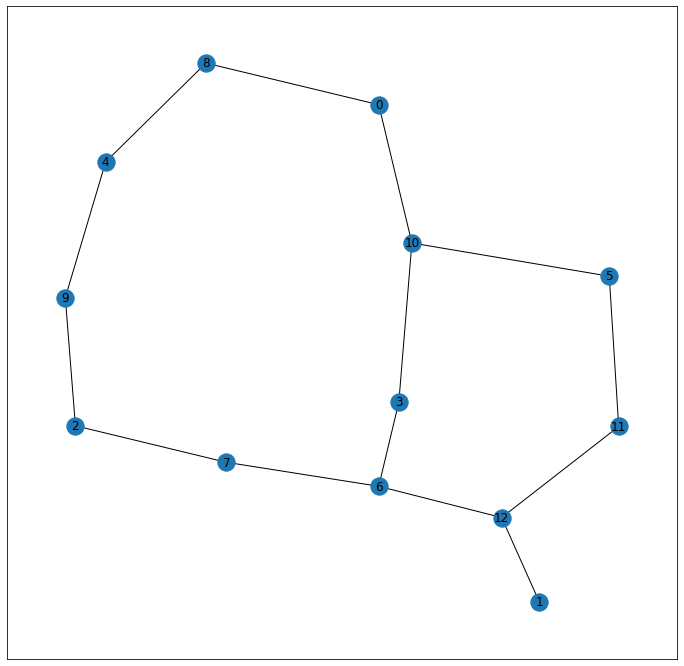

In [36]:
pos = {node: (data['pos'][0], data['pos'][1]) for node, data in Gs.nodes(data=True)}
fig = plt.figure(figsize=(12, 12))
nx.draw_networkx(Gs, pos=pos, with_labels=True)
plt.show()

In [37]:
datos = tiempo_entre_nodos(0,8)
datos

{'tiempo': 55.714285714285715, 'ruta_nodos': [(0, 8)], 'ruta': [0, 8]}

In [38]:
dict_nodos = equivalencia_de_nodos(labels)
dict_nodos

{0: [13, 14, 15, 16, 36, 37, 52, 53, 54, 74, 75, 76],
 1: [20, 21, 22, 23, 24, 25],
 2: [42, 43, 44, 63, 64, 65, 66, 67],
 3: [4, 5, 6, 7, 8],
 4: [47, 69, 70],
 5: [29, 30, 31, 32, 33],
 6: [1, 2, 3, 40, 57, 58, 59],
 7: [41, 60, 61, 62],
 8: [48, 49, 50, 51, 71, 72, 73],
 9: [45, 46, 68],
 10: [9, 10, 11, 12, 34, 35],
 11: [27, 28],
 12: [0, 17, 18, 19, 26, 38, 39, 55, 56]}

In [39]:
conversion_nodos_originales(datos, dict_nodos)   

[[13, 14, 15, 16, 36, 37, 52, 53, 54, 74, 75, 76],
 [48, 49, 50, 51, 71, 72, 73]]

Para este caso en particular se pierde la forma del grafo al ser tan pocos cluster, por lo que se probará escalando la data para evitar que una distancia dommine a la otra en el algoritmo Kmeans.

## Grafo simplificado, escalado y optimizado

Se escalaran las variables de latitude y longitude mediante el método StandarScaler.

In [40]:
from sklearn.preprocessing import StandardScaler

var_pos = ['latitude', 'longitude']

scaler = StandardScaler()
X_trans_pos = scaler.fit_transform(df[var_pos])

df_trans = df.copy()
df_trans[var_pos] = X_trans_pos
df_trans

,vehicle,latitude,longitude,timestamp,nodo_id,tiempo
0,A,0.955267,-1.022602,2022-01-01 08:01:00,0,NaN
1,A,0.470837,-0.932067,2022-01-01 08:02:00,1,60.0
2,A,0.196146,-0.879329,2022-01-01 08:04:00,2,120.0
3,A,0.163670,-0.725946,2022-01-01 08:05:00,3,60.0
4,A,0.204942,-0.565533,2022-01-01 08:06:00,4,60.0
5,A,0.242154,-0.438959,2022-01-01 08:07:00,5,60.0
6,A,0.256362,-0.442475,2022-01-01 08:08:00,6,60.0
7,A,0.290867,-0.339635,2022-01-01 08:09:00,7,60.0
8,A,0.341611,-0.146698,2022-01-01 08:10:00,8,60.0
9,A,0.471514,0.221594,2022-01-01 08:11:00,9,60.0


Se vuelven a determinar la inercia para un rango de cluster.

In [41]:
X = df_trans[['latitude', 'longitude']].values
k_range = range(1,60)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


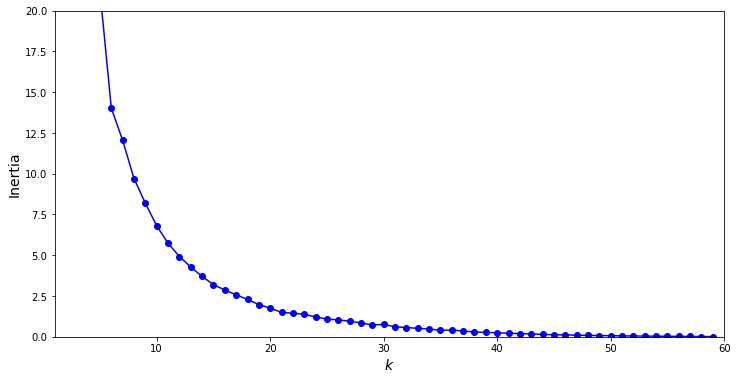

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 60, 0, 20])
plt.show()

Se calcula el puntaje de silhouette.

In [43]:
silhouette_scores = [silhouette_score(X, model.labels_) 
                     for model in kmeans_per_k[1:]]

Se determina la mejor cantidad de cluster que agrupan de mejor forma los datos.

In [44]:
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

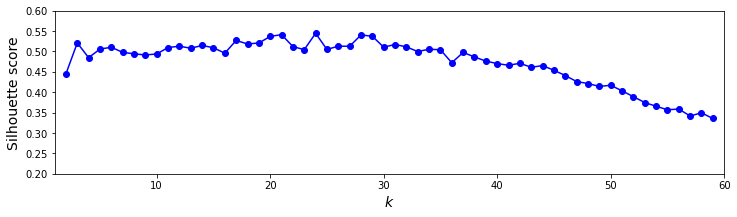

In [45]:
plt.figure(figsize=(12, 3))
plt.plot(range(2, 60), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1, 60, 0.2, 0.6])
plt.show()

In [46]:
best_k

23

Se vuelven a calcular los centroides con 23 cluster y se genera nuevamente el grafo simplificado.

In [47]:
kmeans = KMeans(n_clusters=23, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

Para este caso se debe aplicar la inversa a las columnas de latitude y longitude para que esten en la misma escala que el grafo original.

In [48]:
centroids_inv = scaler.inverse_transform(centroids)

A las coordenadas de los nodos originales también se les aplica la inversa.

In [49]:
X_inv = scaler.inverse_transform(X)

In [50]:
Gs = nx.Graph()
for i, centroid in enumerate(centroids_inv):
    Gs.add_node(i, pos=(centroid[0], centroid[1]))

In [51]:
# Se define un diccionario para almacenar los peso originales de los arcos s.
original_weights = {} 
for edge_0, edge_1, data in G.edges(data=True):
# Se determina la distancia euclideana 
    dists0 = np.linalg.norm(X_inv[edge_0] - centroids_inv, axis=1)
    dists1 = np.linalg.norm(X_inv[edge_1] - centroids_inv, axis=1)
    
# Se determina el centroide mas cercano a los dos nodos del borde del arco
    centroid_idx0 = np.argmin(dists0)
    centroid_idx1 = np.argmin(dists1)

# Si el centroide es el mismo, se ocupa el segundo menor
    if centroid_idx0 == centroid_idx1:
        dists0_ordenadas = np.argsort(dists0)
        dists1_ordenadas = np.argsort(dists1)
        
        if dists0_ordenadas[1] < dists1_ordenadas[1]:
            centroid_idx0 = dists0_ordenadas[1]
        else:
            centroid_idx1 = dists1_ordenadas[1]
        
# Se define el arco del grafo simplificado    
    Gs_edge = (centroid_idx0, centroid_idx1)

# Se agregan los arcos al nodo simplificado
    if Gs_edge not in Gs.edges():
        Gs.add_edge(*Gs_edge, weight=0)
        
# Se agregan a los arcos simplificados los tiempos del arco original
    if Gs_edge not in original_weights:
        original_weights[Gs_edge] = []
    original_weights[Gs_edge].append(data['weight'])

Consolidación de los pesos del arco del grafo simplificado mediante el promedio de los peso del grafo original.

In [52]:
for Gs_edge in Gs.edges:
    inverted_edge = (Gs_edge[1], Gs_edge[0])

# Si el arco simplificado y el invertido estan, entonces se saca promedio
    if Gs_edge in original_weights and inverted_edge in original_weights:
        Gs.edges[Gs_edge]['weight'] = (sum(original_weights[Gs_edge]) + sum(original_weights[inverted_edge])) / (len(original_weights[Gs_edge]) + len(original_weights[inverted_edge]))

# Si el arco simplifcado esta y el invertido no, entonces es el promedio del s.
    elif Gs_edge in original_weights and inverted_edge not in original_weights:
        Gs.edges[Gs_edge]['weight'] = sum(original_weights[Gs_edge]) / len(original_weights[Gs_edge])

# Si solo el invertido esta en el diccionario y el original no entonces
    elif Gs_edge not in original_weights and inverted_edge in original_weights:
        Gs.edges[Gs_edge]['weight'] = sum(original_weights[inverted_edge]) / len(original_weights[inverted_edge])
  
    else:
        Gs.edges[Gs_edge]['weight'] = 0

El grafo con 23 cluster tiene una forma mucho mas similar al grafo original, por lo que se considera este grafo como una simplificación efectiva y bien aproximada al original.

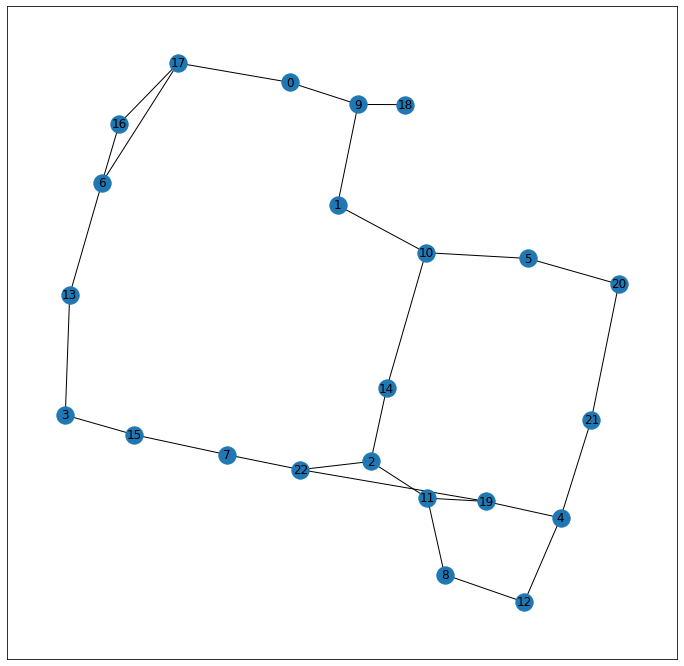

In [53]:
pos = {node: (data['pos'][0], data['pos'][1]) for node, data in Gs.nodes(data=True)}
fig = plt.figure(figsize=(12, 12))
nx.draw_networkx(Gs, pos=pos, with_labels=True)
plt.show()

In [54]:
for u, v, attrs in Gs.edges(data=True):
    print(f"Arco ({u}, {v}) tiene un tiempo de {attrs['weight']}")

Arco (0, 17) tiene un tiempo de 75.0
Arco (0, 9) tiene un tiempo de 30.0
Arco (1, 10) tiene un tiempo de 100.0
Arco (1, 9) tiene un tiempo de 100.0
Arco (2, 11) tiene un tiempo de 75.0
Arco (2, 14) tiene un tiempo de 60.0
Arco (2, 22) tiene un tiempo de 90.0
Arco (3, 15) tiene un tiempo de 68.57142857142857
Arco (3, 13) tiene un tiempo de 80.0
Arco (4, 12) tiene un tiempo de 120.0
Arco (4, 19) tiene un tiempo de 0.0
Arco (4, 21) tiene un tiempo de 120.0
Arco (5, 10) tiene un tiempo de 60.0
Arco (5, 20) tiene un tiempo de 40.0
Arco (6, 13) tiene un tiempo de 90.0
Arco (6, 17) tiene un tiempo de 60.0
Arco (6, 16) tiene un tiempo de 120.0
Arco (7, 22) tiene un tiempo de 60.0
Arco (7, 15) tiene un tiempo de 60.0
Arco (8, 11) tiene un tiempo de 30.0
Arco (8, 12) tiene un tiempo de 45.0
Arco (9, 18) tiene un tiempo de 60.0
Arco (10, 14) tiene un tiempo de 60.0
Arco (11, 19) tiene un tiempo de 40.0
Arco (16, 17) tiene un tiempo de 30.0
Arco (19, 22) tiene un tiempo de 60.0
Arco (20, 21) tiene

In [55]:
datos = tiempo_entre_nodos(2,11)
datos

{'tiempo': 75.0, 'ruta_nodos': [(2, 11)], 'ruta': [2, 11]}

In [56]:
dict_nodos = equivalencia_de_nodos(labels)
dict_nodos

{0: [51, 52, 73, 74],
 1: [12, 13, 35],
 2: [2, 3, 4, 58],
 3: [43, 44, 64, 65, 66, 67],
 4: [25, 26],
 5: [32, 33],
 6: [47, 69],
 7: [41, 61],
 8: [19, 20],
 9: [14, 15, 36, 53, 75],
 10: [9, 10, 11, 34],
 11: [1, 18, 56, 57],
 12: [21, 22, 23, 24],
 13: [45, 46, 68],
 14: [5, 6, 7, 8],
 15: [42, 62, 63],
 16: [70],
 17: [48, 49, 50, 71, 72],
 18: [16, 37, 54, 76],
 19: [0, 17, 38, 39, 55],
 20: [29, 30, 31],
 21: [27, 28],
 22: [40, 59, 60]}

In [57]:
conversion_nodos_originales(datos, dict_nodos)

[[2, 3, 4, 58], [1, 18, 56, 57]]